In [1]:
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import math

In [2]:
# load network information
data = pd.read_csv('grn.csv', sep='\t', decimal='.')
for i in data.index:
    if ':' in data.loc[i,'TF']:
        tf = data.loc[i, 'TF']
        data.loc[i,'TF'] = tf.split(':', 1)[0]
    if ':' in data.loc[i,'Target']:
        target = data.loc[i, 'Target']
        data.loc[i,'Target'] = target.split(':', 1)[0]
data

,TF,Target,Regulatory Mode
0,PA5438,aceE,-
1,PA5438,aceF,-
2,phoP,ackA,-
3,lasR,acpP,+
4,rhlR,acpP,+
...,...,...,...
1571,np20,znuB,-
1572,np20,znuC,-
1573,crc,zwf,?
1574,PA3184,zwf,-


In [3]:
# create the graph based on number of genes
n_vertices = pd.concat([data['TF'], data['Target']]).unique()
g = ig.Graph(n_vertices.shape[0], directed=True)
g.summary()

'IGRAPH D--- 1047 0 -- '

In [4]:
# add the vertices attributes
g.vs['name'] = n_vertices.tolist()

In [5]:
# add the edges
for i in data.index:
    for j in g.vs.indices:
        if data.loc[i, 'TF'] == g.vs[j]['name']:
            source = g.vs[j]['name']
        if data.loc[i, 'Target'] == g.vs[j]['name']:
            target = g.vs[j]['name']
    g.add_edge(source, target)
g.summary()

'IGRAPH DN-- 1047 1576 -- \n+ attr: name (v)'

In [6]:
# add the edges attributes
g.es['mode'] = data['Regulatory Mode'].to_list()

In [7]:
# add the color attributes to edge according to mode (X11 color names)
for i in g.es.indices:
    if g.es[i]['mode'] == '+':
        g.es[i]['color'] = 'forest green'
    if g.es[i]['mode'] == '-':
        g.es[i]['color'] = 'red'
    if g.es[i]['mode'] == 'd':
        g.es[i]['color'] = 'medium blue'
    if g.es[i]['mode'] == '?':
        g.es[i]['color'] = 'web gray'

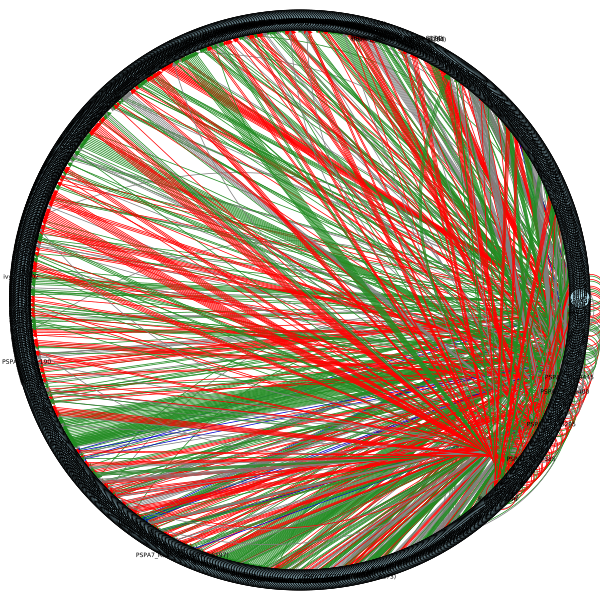

In [8]:
# network plot
ig.plot(g, layout='circular',
        vertex_color='light blue',
        vertex_label=g.vs['name'],
        vertex_label_size=6,
        edge_width=0.75,
        edge_arrow_size=0.35,
        edge_arrow_width=1.5
)

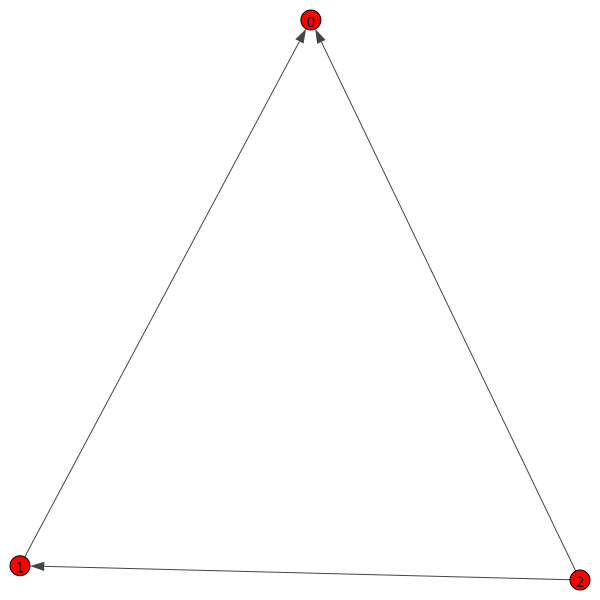

In [9]:
# create the FFL graph
ffl = g.Isoclass(n=3, cls=7, directed=True)
ig.plot(ffl, vertex_label=ffl.vs.indices)

In [10]:
# compare with network graph
sub = g.get_subisomorphisms_vf2(ffl)
sub = sub[0:28] # the example network has too many subgraphs
sub

[[2, 15, 27],
 [2, 26, 27],
 [2, 27, 15],
 [2, 27, 26],
 [2, 27, 79],
 [2, 79, 27],
 [2, 86, 13],
 [3, 2, 15],
 [3, 2, 26],
 [3, 2, 27],
 [3, 2, 86],
 [3, 15, 27],
 [3, 26, 27],
 [3, 27, 2],
 [3, 27, 15],
 [3, 27, 26],
 [5, 69, 112],
 [11, 9, 10],
 [16, 9, 10],
 [16, 10, 17],
 [16, 11, 9],
 [16, 11, 10],
 [16, 11, 15],
 [27, 2, 15],
 [27, 2, 26],
 [27, 2, 79],
 [27, 3, 2],
 [27, 3, 15]]

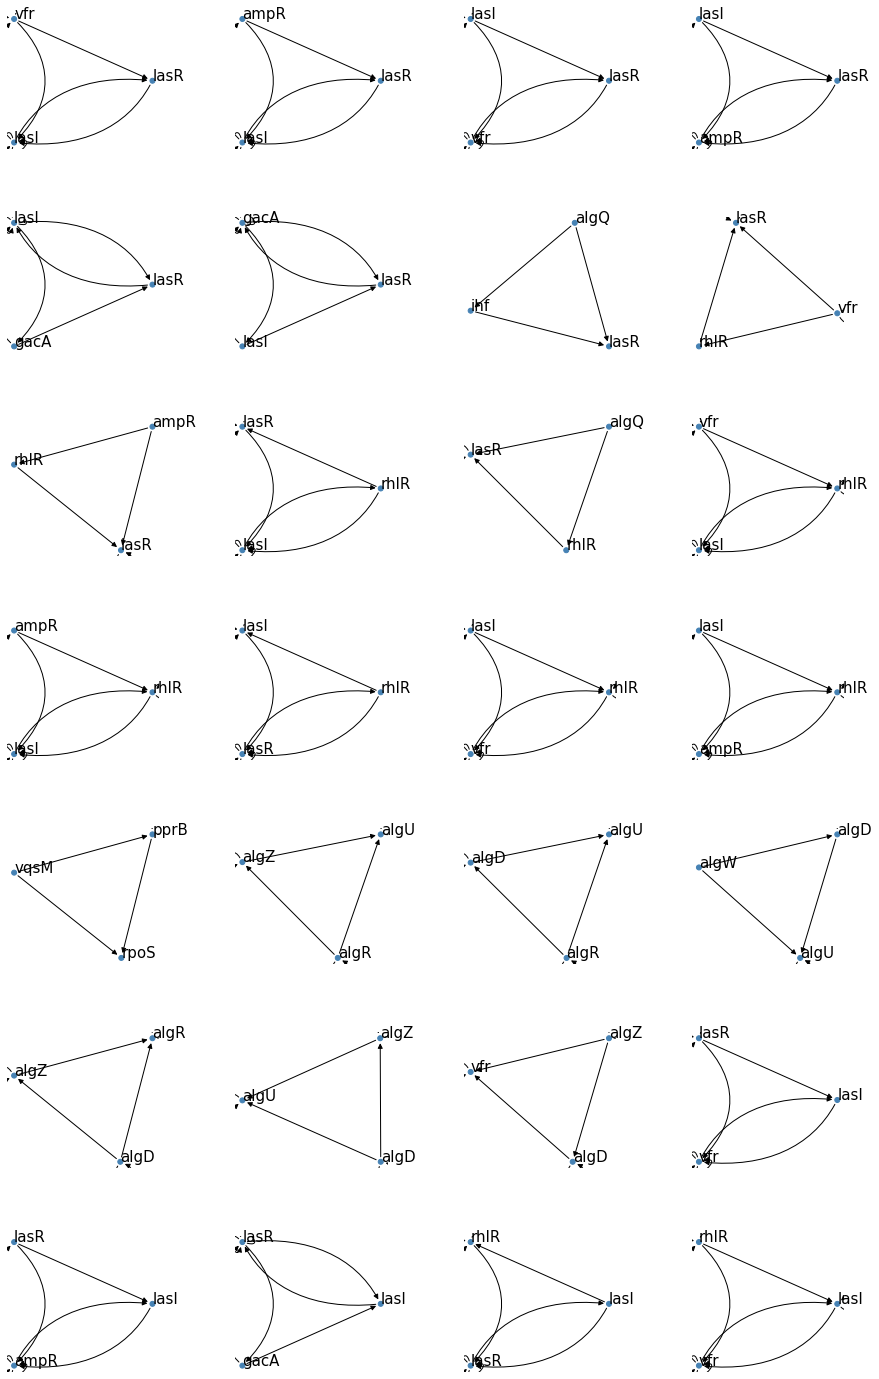

In [11]:
# plot the subgraphs
ffls = []
for i in range(len(sub)):
    vtx = g.vs.select(sub[i])
    ffl = g.subgraph(vtx)
    ffl.vs['name'] = g.vs[sub[i]]['name']
    ffls.append(ffl)

visual_style = {'vertex_label_size': 15}

fig, axs = plt.subplots(nrows=7, ncols=4, figsize=(15,25))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axs = axs.ravel()
for ax in axs:
    ax.set_axis_off()
for ffl, ax in zip(ffls, axs):
    ig.plot(ffl, target=ax, vertex_label=ffl.vs['name'], **visual_style)
plt.show()

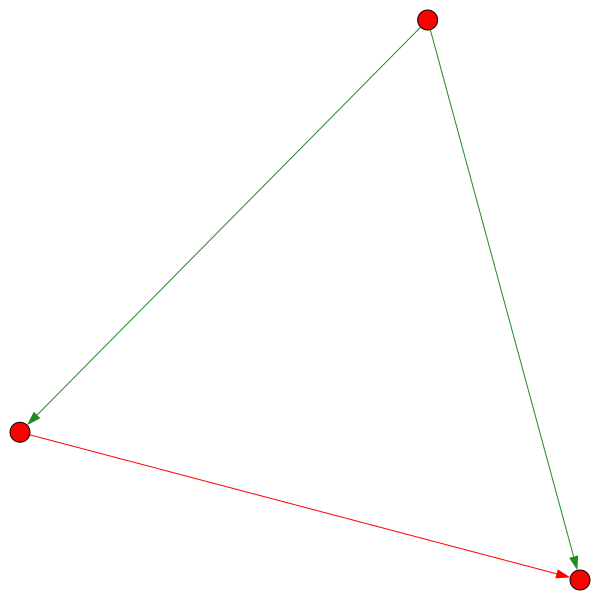

In [12]:
# individual plots show the edge colors
ig.plot(ffls[6])